# Importing libraries

In [1]:
import sys
sys.path.append('/Users/s2223060/Desktop/primordial_features/')
import numpy as np
import matplotlib.pyplot as plt
from ps_constructor import PowerSpectrumConstructor
from scipy.interpolate import interp1d

# Initializing the PS constructor

The initializationg of the constructor requires a file containing the linear matter power spectrum (w/ and w/o the wiggles) and the wiggly matter power spectrum. We will teach how to generate it in another file. Here, I will use these products for BOSS high-z

In [2]:
fn = '/Users/s2223060/Desktop/primordial_features/cosmologies/power_spectrum/DESI_LRG3_ELG1_plin_decomp.txt'

In [3]:
#momentum array to evaluate the data on
kh_data = np.linspace(1e-3, 0.2, 1000)

In [4]:
ps_model_lin = PowerSpectrumConstructor(fn, 'lin', kh_data)
ps_model_log = PowerSpectrumConstructor(fn, 'log', kh_data)
ps_model_none = PowerSpectrumConstructor(fn, 'None', kh_data)

In [5]:
B = 1
sigma_nl = 0
sigma_s = 0
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
alpha = 1
A = 0.1
omega_lin = 200
omega_log = 30
phi = 0.2
params = [B, a0, a1, a2, a3, a4, alpha,sigma_nl, sigma_s]

Once the parameters are listed, the PF models can be easily accessed:

In [6]:
ps_lin = ps_model_lin.Evaluate_bare(params + [A, omega_lin, phi])
ps_log = ps_model_log.Evaluate_bare(params + [A, omega_log, phi])
ps_none = ps_model_none.Evaluate_bare(params)

In [7]:
data = [x for x in [ps_lin,ps_log, ps_none]]
labels = ['Linear Feature', 'Logarithmic Feature', 'Only BAO']

Linear Feature
Logarithmic Feature
Only BAO


Text(0, 0.5, '$kP(k)$')

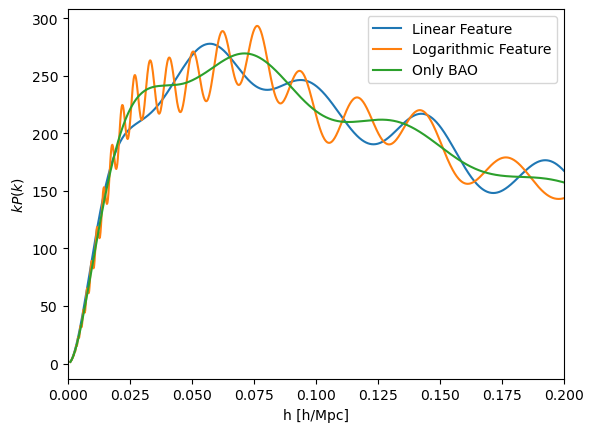

In [8]:
plt.figure()
for x,label in zip(data, labels):
    print(label)
    plt.plot(kh_data, kh_data*x, label = label)
plt.legend()
plt.xlim(0,0.2)
plt.xlabel('h [h/Mpc]')
plt.ylabel(r'$kP(k)$')

# Generate fake data for unit test

To guarantee the pipeline is working properly, I will generate some fictitious data and try to recover the parameters

In [ ]:
#momentum array to evaluate the data on
kmin = 0.01
kmax = 0.2
dk = 0.0005
k_bins = np.arange(kmin,kmax + dk, dk) # [h/Mpc]
k_ctrs = 0.5*(k_bins[1:] + k_bins[:-1])
h = 0.676

In [ ]:
omega_ny = np.pi/dk/h
print(f"The Nyquist frequency for the linear oscillations is {omega_ny} Mpc")
omega_lin = 9000 #Mpc

In [ ]:
BNGC = 2
BSGC = 3
sigma_nl = 0
sigma_s = 0
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
alpha = 1
A = 0.1
omega_lin = 9000
phi = 0
params_NGC = [BNGC, a0, a1, a2, a3, a4, alpha, sigma_nl, sigma_s, ]
params_SGC = [BSGC, a0, a1, a2, a3, a4, alpha, sigma_nl, sigma_s, ]

In [ ]:
ps_model_lin_unit_test = PowerSpectrumConstructor(fn, 'lin', k_ctrs)
ps_model_lin_unit_test.h=0.676

In [ ]:
plt.figure()
plt.plot(k_ctrs, k_ctrs*ps_model_lin_unit_test.Evaluate_bare(params_NGC + [A, omega_lin, phi]))
plt.plot(k_ctrs, k_ctrs*ps_model_lin_unit_test.Evaluate_bare(params_SGC + [A, omega_lin, phi]))

# External $\delta P(k)$

In [9]:
from scipy.interpolate import interp1d

In [10]:
ps_model_ext = PowerSpectrumConstructor(fn, 'external', kh_data)

In [11]:
ps_model_ext = PowerSpectrumConstructor(fn, 'external', kh_data)
deltaP_ext = np.loadtxt('RECON_Alens_PPS_Onespectrum.dat')
deltaP_ext = interp1d(deltaP_ext[3:,0], 1 - deltaP_ext[3:,1]/deltaP_ext[3:,2])
ps_model_ext.external_deltaP(deltaP_ext)

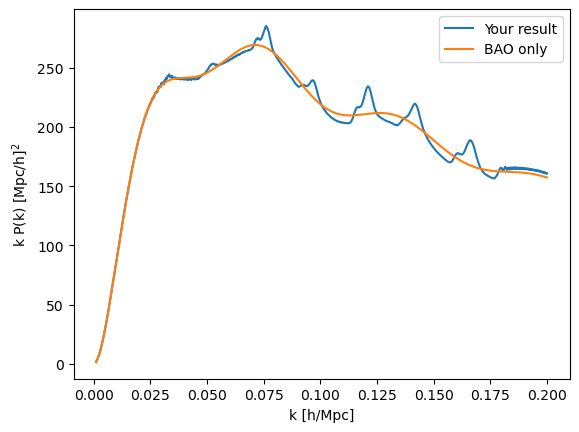

In [15]:
plt.figure()
plt.plot(kh_data, kh_data*ps_model_ext.Evaluate_bare(params), label = 'Your result')
plt.plot(kh_data, kh_data*ps_model_none.Evaluate_bare(params), label = 'BAO only')
plt.xlabel('k [h/Mpc]')
plt.ylabel('k P(k) [Mpc/h]$^2$')
plt.legend()